Sentiment Analysis on Movie Reviews

Submitted by: Anagha Mohan
Date        : 13/08/2023

Import the libraries and read the dataset

In [33]:
import pandas as pd
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [3]:
data = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [4]:
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
#sentiment count
data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [6]:
x = data['review']
y = data['sentiment']

Data Preprocessing

In [7]:
data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [8]:
# Handle missing values if any
data['review'].fillna('', inplace=True)

In [9]:
text = x.str.cat(sep=' ')
text

In [10]:
text = text.lower()
text

In [12]:
#split the dataset
#train dataset
train_reviews=data.review[:20000]
train_sentiments=data.sentiment[:20000]
#test dataset
test_reviews=data.review[20000:]
test_sentiments=data.sentiment[20000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(20000,) (20000,)
(5000,) (5000,)


Text Normalization

In [20]:
nltk.download('stopwords')
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [24]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['review']=data['review'].apply(simple_stemmer)

**Stopword removal**

In [28]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
data['review']=data['review'].apply(remove_stopwords)

{'only', 'isn', 'before', 'while', 'as', "you've", 're', 'i', 'which', 'same', 'does', 'can', 'herself', 'whom', 'any', 'out', 'how', 'o', "shouldn't", 'other', 'about', 'most', "you're", 'very', 'once', 'so', 'not', 'ain', 'won', 'when', 'they', 'being', 'needn', 'you', 'a', 'what', 'into', 'under', 'were', 'from', "that'll", 'or', "weren't", 'his', 'down', "mightn't", "mustn't", 'him', 'doesn', 'shan', 'those', 'there', 'yours', 'too', 'd', "isn't", "wasn't", 'don', "needn't", 'is', 'below', 'was', 'again', 'no', 't', 'hadn', 'because', 'be', "won't", 'have', 'where', 'them', 'in', 'who', 'through', 'few', 'mustn', 'my', 'and', 'will', 'been', 'after', "it's", "aren't", 'wasn', 'more', 'are', 'off', 'own', "should've", 'an', "you'll", 'did', 'y', 'at', 'wouldn', 'we', 'for', 'both', 'all', 'if', 'hasn', 'between', 's', 'to', 'aren', "wouldn't", 'shouldn', 'ourselves', 'on', 'until', "hasn't", 'll', 'just', 'this', 'it', 'ours', 'yourselves', 'nor', 'why', 'here', 'up', 'm', 'himself'

**Feature Extraction**

 **Bag of Words Model**

In [32]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (20000, 3567880)
BOW_cv_test: (5000, 3567880)


In [34]:
#labeling the sentiment data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(25000, 1)


In [37]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:20000]
test_sentiments=sentiment_data[20000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


**Modelling the dataset**

In [46]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [39]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


**Logistic regression model performane on test dataset**

In [40]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)

[0 1 1 ... 1 0 0]


**Accuracy of the model**

In [42]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [43]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)


lr_bow_score : 0.6934


Printing report

In [44]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

              precision    recall  f1-score   support

    Positive       0.63      0.92      0.75      2472
    Negative       0.86      0.47      0.61      2528

    accuracy                           0.69      5000
   macro avg       0.74      0.70      0.68      5000
weighted avg       0.75      0.69      0.68      5000



Confusion matrix

In [45]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)

[[1188 1340]
 [ 193 2279]]


Stochastic gradient descent or Linear support vector machines for bag of words features

In [47]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(max_iter=500, random_state=42)


In [48]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)

[0 0 0 ... 0 0 0]


In [49]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)

svm_bow_score : 0.6012


In [50]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)

              precision    recall  f1-score   support

    Positive       0.55      0.99      0.71      2472
    Negative       0.94      0.23      0.36      2528

    accuracy                           0.60      5000
   macro avg       0.75      0.61      0.54      5000
weighted avg       0.75      0.60      0.53      5000



In [51]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)

[[ 570 1958]
 [  36 2436]]


**Multinomial Naive Bayes**

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()


In [59]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)

[0 1 1 ... 1 0 0]


In [60]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)

mnb_bow_score : 0.7546


In [61]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)

              precision    recall  f1-score   support

    Positive       0.74      0.77      0.76      2472
    Negative       0.77      0.74      0.75      2528

    accuracy                           0.75      5000
   macro avg       0.76      0.75      0.75      5000
weighted avg       0.76      0.75      0.75      5000



In [62]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)

[[1859  669]
 [ 558 1914]]


**Word cloud for positive review words**

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

<function matplotlib.pyplot.show(close=None, block=None)>

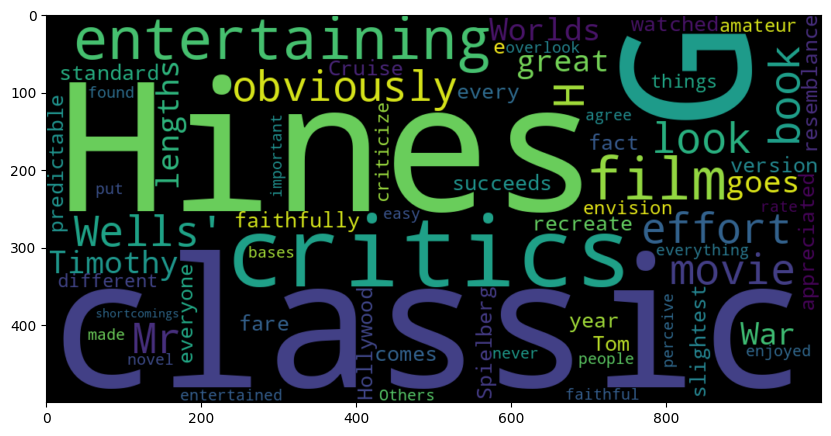

In [68]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

**Word cloud for negative review words**

<function matplotlib.pyplot.show(close=None, block=None)>

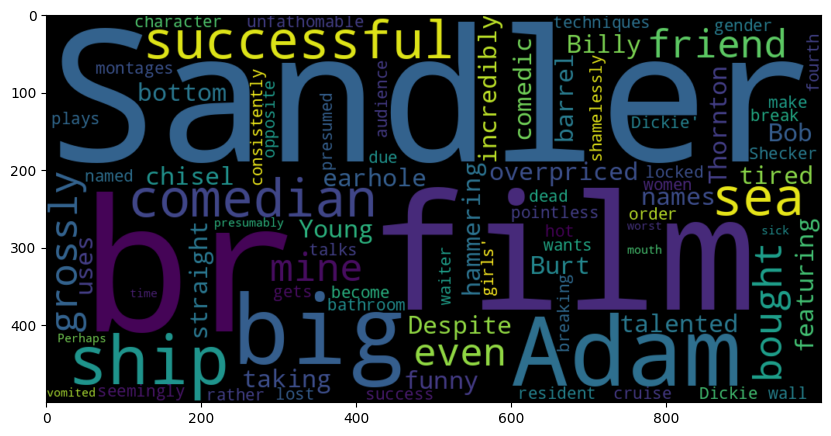

In [69]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

### Accuracy Obtained
### Logistic Regression:0.69
### SGD or SVM : 0.60
### Multinomial Naive Bayes:0.75

By conclusion we can say that multinomial naive bayes model performing well compared to other models.
Also we can improve model performance